In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

616

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library
import requests
# Import the API key
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our cities list
for i, city in enumerate(cities):
    # Group cities into sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | antalaha
Processing Record 3 of Set 1 | karratha
Processing Record 4 of Set 1 | agirish
Processing Record 5 of Set 1 | sao joao da barra
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | kangaatsiaq
Processing Record 10 of Set 1 | danielskuil
Processing Record 11 of Set 1 | georgetown
Processing Record 12 of Set 1 | taloqan
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | hirara
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | mogadishu
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | erenhot
Proces

Processing Record 38 of Set 4 | dasoguz
Processing Record 39 of Set 4 | kaitangata
Processing Record 40 of Set 4 | los llanos de aridane
Processing Record 41 of Set 4 | puerto escondido
Processing Record 42 of Set 4 | provideniya
Processing Record 43 of Set 4 | kawalu
Processing Record 44 of Set 4 | ulladulla
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | fortuna
Processing Record 47 of Set 4 | walvis bay
Processing Record 48 of Set 4 | dover
Processing Record 49 of Set 4 | hamilton
Processing Record 50 of Set 4 | iquique
Processing Record 1 of Set 5 | gimli
Processing Record 2 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 3 of Set 5 | peniche
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | brae
Processing Record 6 of Set 5 | kahului
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | kushiro
Processing Record 9 of Set 5 | bambanglipuro
Processing Record 10 of Set 5 | ojinaga
Processing Re

Processing Record 25 of Set 8 | cam ranh
Processing Record 26 of Set 8 | tatawin
Processing Record 27 of Set 8 | billings
Processing Record 28 of Set 8 | ayorou
Processing Record 29 of Set 8 | paita
Processing Record 30 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 31 of Set 8 | ancud
Processing Record 32 of Set 8 | sampit
Processing Record 33 of Set 8 | suntar
Processing Record 34 of Set 8 | mallama
City not found. Skipping...
Processing Record 35 of Set 8 | iranshahr
Processing Record 36 of Set 8 | mizan teferi
Processing Record 37 of Set 8 | bhimunipatnam
Processing Record 38 of Set 8 | serebryansk
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | usinsk
Processing Record 41 of Set 8 | barbar
City not found. Skipping...
Processing Record 42 of Set 8 | honningsvag
Processing Record 43 of Set 8 | pochutla
Processing Record 44 of Set 8 | kwinana
Processing Record 45 of Set 8 | mmabatho
Processing Record 46 of Set 8 | medea
Processing Record 47

Processing Record 12 of Set 12 | korla
Processing Record 13 of Set 12 | fevik
Processing Record 14 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 12 | ganzhou
Processing Record 16 of Set 12 | aasiaat
Processing Record 17 of Set 12 | san quintin
Processing Record 18 of Set 12 | turan
Processing Record 19 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 12 | ruteng
Processing Record 21 of Set 12 | lokosovo
Processing Record 22 of Set 12 | beitbridge
Processing Record 23 of Set 12 | winnemucca
Processing Record 24 of Set 12 | hutchinson
Processing Record 25 of Set 12 | uige
Processing Record 26 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 27 of Set 12 | pravia
Processing Record 28 of Set 12 | chaoyang
Processing Record 29 of Set 12 | glendive
Processing Record 30 of Set 12 | sandwick
Processing Record 31 of Set 12 | changping
Processing Record 32 of Set 12 | sidi ali
Processing Record 33 of Se

In [11]:
len(city_data)

562

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Antalaha,-14.9003,50.2788,81.97,59,65,5.73,MG,2021-11-14 05:58:55
1,Karratha,-20.7377,116.8463,89.80,18,31,15.35,AU,2021-11-14 05:58:55
2,Agirish,61.9247,63.0231,12.06,87,24,4.72,RU,2021-11-14 05:58:55
3,Sao Joao Da Barra,-21.6403,-41.0511,66.96,68,98,5.73,BR,2021-11-14 05:58:56
4,Mar Del Plata,-38.0023,-57.5575,65.08,89,90,1.99,AR,2021-11-14 05:58:56
5,Kodiak,57.7900,-152.4072,24.01,75,60,10.98,US,2021-11-14 05:58:56
6,Kangaatsiaq,68.3065,-53.4641,11.57,94,64,10.27,GL,2021-11-14 05:58:57
7,Danielskuil,-28.1887,23.5395,72.27,26,9,11.23,ZA,2021-11-14 05:58:57
8,Georgetown,5.4112,100.3354,85.95,75,20,5.01,MY,2021-11-14 05:56:44
9,Taloqan,36.7361,69.5345,48.15,62,86,1.88,AF,2021-11-14 05:58:57


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Antalaha,MG,2021-11-14 05:58:55,-14.9003,50.2788,81.97,59,65,5.73
1,Karratha,AU,2021-11-14 05:58:55,-20.7377,116.8463,89.80,18,31,15.35
2,Agirish,RU,2021-11-14 05:58:55,61.9247,63.0231,12.06,87,24,4.72
3,Sao Joao Da Barra,BR,2021-11-14 05:58:56,-21.6403,-41.0511,66.96,68,98,5.73
4,Mar Del Plata,AR,2021-11-14 05:58:56,-38.0023,-57.5575,65.08,89,90,1.99
...,...,...,...,...,...,...,...,...,...
557,Muli,MV,2021-11-14 06:14:15,2.9167,73.5667,83.26,76,91,17.05
558,Bartlesville,US,2021-11-14 06:10:01,36.7473,-95.9808,50.56,72,32,5.99
559,Pacasmayo,PE,2021-11-14 06:14:15,-7.4006,-79.5714,62.22,85,62,10.60
560,Jacmel,HT,2021-11-14 06:14:15,18.2342,-72.5347,75.04,85,58,3.65


In [14]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"
# Export the city data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [15]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

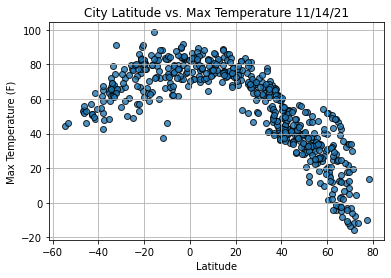

In [16]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig1.png')
# Show plot
plt.show()

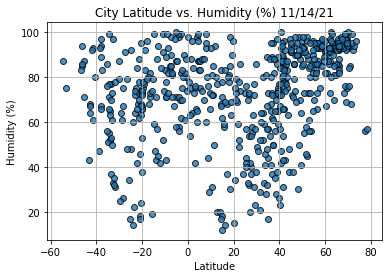

In [17]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, humidity, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig2.png')
# Show plot
plt.show()

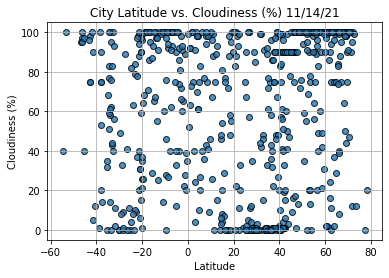

In [18]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, cloudiness, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig3.png')
# Show plot
plt.show()

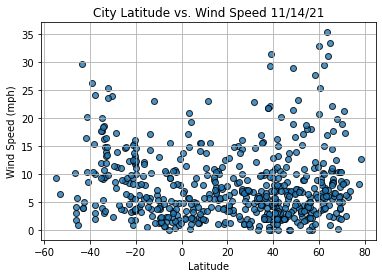

In [19]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, wind_speed, edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig4.png')
# Show plot
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2021-11-14 05:58:59
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    73.49
Humidity                       72
Cloudiness                     84
Wind Speed                  12.26
Name: 13, dtype: object

In [22]:
# Create the northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

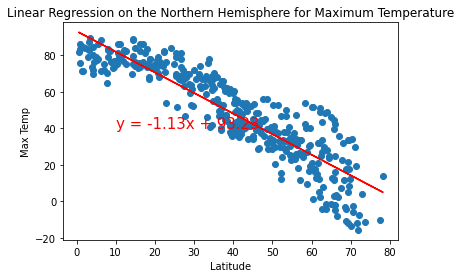

In [23]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10,40))

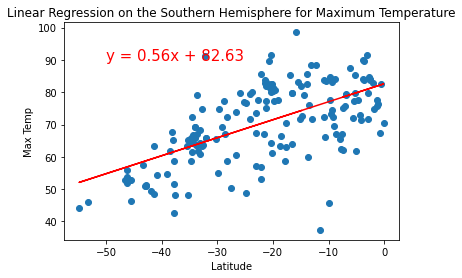

In [24]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

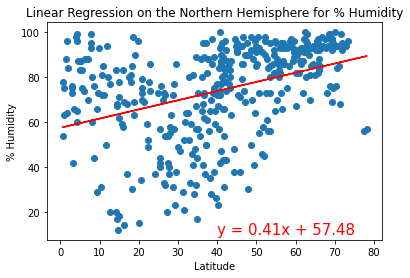

In [25]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

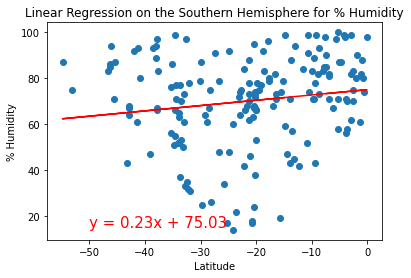

In [26]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,15))

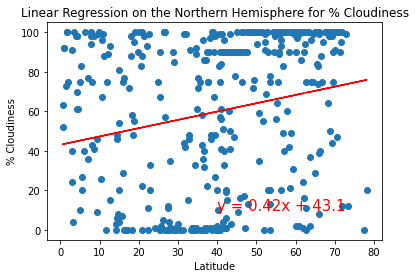

In [28]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (40,10))

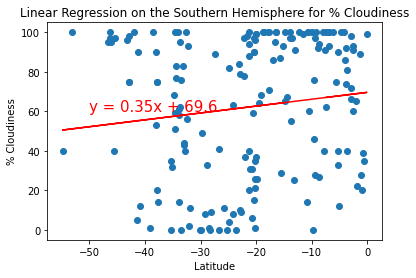

In [29]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness', (-50,60))

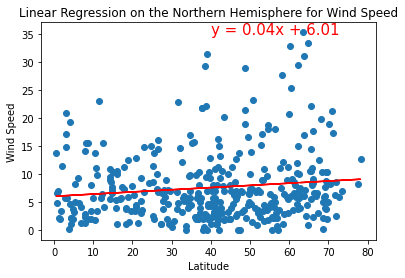

In [30]:
# Linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40,35))

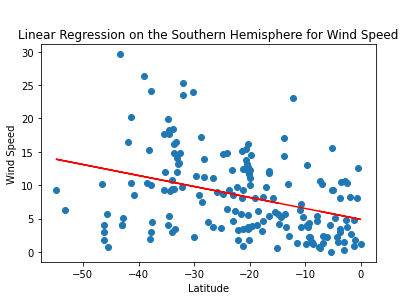

In [31]:
# Linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50,35))